# Text Analysis

In [1]:
# importing all the necessary libraries
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset into a dataframe for manipulation
df = pd.read_csv('Whatsapp_Chat_Table.csv', index_col=0)

In [3]:
# converted to datetime datatype as the default datatype considered was object
df['date_time'] = pd.to_datetime(df.date_time, format='%Y-%m-%d %H:%M:%S')

In [4]:
df['date_time'].dtype

dtype('<M8[ns]')

In [5]:
# bifurcating datetime into 4 different columns for further analysis
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [6]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


### 1. Most Active Users of the group (by messages)

In [7]:
print(f"The number of people in the group who haven't sent a single text on the group = {237 - len(df.user.unique())-1}")

The number of people in the group who haven't sent a single text on the group = 81


In [8]:
df2 = df.copy()    

# extracting only messages from the dataset
df2 = df2[df2.user != "group_notification"]

# counting the number of messages and grouping them by person
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2476
1,"Dheeraj Lalwani (TSEC, CS)",1888
2,"Darshan Rander (TSEC, IT)",1387
3,"Kartik Soneji (TSEC, CS)",792
4,"Harsh Kapadia (TSEC IT, SE)",748
5,"Pratik K (TSEC CS, SE)",732
6,"Saurav Upoor (TSEC CS, SE)",534
7,Tushar Nankani,323
8,+91 82916 21138,269
9,"Farhan Irani (TSEC IT, SE)",252


In [9]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]

top10df.initials[8] = "Someone"  #since the number is not saved we'll just put it as an someone

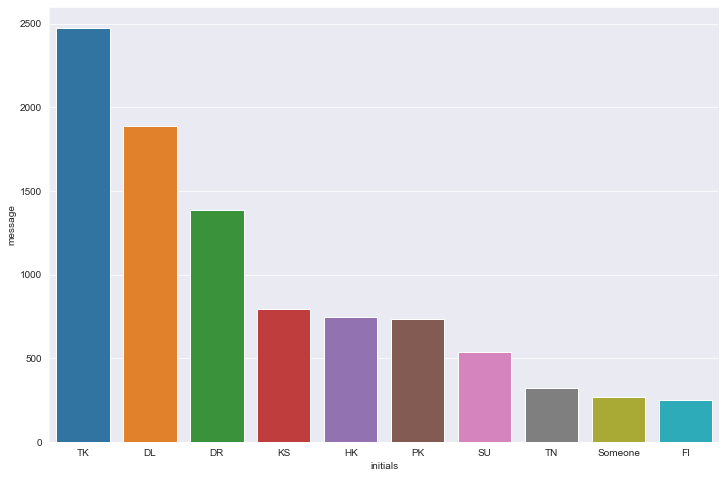

In [10]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8))

sns.barplot(top10df.initials, top10df.message, data=top10df);
# plt.plot(top10df.initials, top10df.message, 'o--c', color='m');   # line chart


In [11]:

def get_colors_of_certain_order(names_in_certain_order):
#     the color of a certain person remains the same, no matter the plot
    
    order = list(names_in_certain_order)
    return_list = []
    
    for name in order:
        return_list.append(color_dict[name])
        
#     returns the color list in the order of names provided in the list parameter
    return return_list

In [12]:
# selecting a gradient set of colours from www.coolors.co
colors = ['#F94144', '#F3722C', '#F8961E', '#FDC500', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#003F88']

# mapping all users to particular colors to maintain consistency of colours in the graph
names = top10df.initials

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict


{'TK': '#F94144',
 'DL': '#F3722C',
 'DR': '#F8961E',
 'KS': '#FDC500',
 'HK': '#F9C74F',
 'PK': '#90BE6D',
 'SU': '#43AA8B',
 'TN': '#577590',
 'Someone': '#6D597A',
 'FI': '#003F88'}

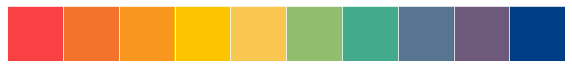

In [13]:
# visualising the color pallete we will be using throughout for the visualisation
sns.palplot(colors)

In [14]:
# Adding another column for message length; using the apply method;
df2 = df.copy()
df2['message'] = df2['message'].apply(lambda x: str(x))
df2['message_length'] = df2['message'].apply(lambda x :  len(x))

# Creating another dataframe for average length per user;
avg_msg_lengths = df2.groupby(df2.user).mean().reset_index().sort_values(by = 'message_length', ascending = False)

# Creating helper columns;
top10df['avg_message_length'] = [0] * 10
i, j = 0, 0
while i < 10:
    if top10df['user'][i] == avg_msg_lengths['user'][j]:
        top10df['avg_message_length'][i] = avg_msg_lengths['message_length'][j]
        i += 1
        j = -1
    j += 1

# Sorting the average message lengths of the same to 10 active users;
top10df_msg = top10df.sort_values(by = "avg_message_length", ascending=False)

In [15]:
top10df_msg

,user,message,initials,avg_message_length
7,Tushar Nankani,323,TN,58.183616
3,"Kartik Soneji (TSEC, CS)",792,KS,47.502973
8,+91 82916 21138,269,Someone,46.385455
5,"Pratik K (TSEC CS, SE)",732,PK,34.929577
4,"Harsh Kapadia (TSEC IT, SE)",748,HK,33.293671
6,"Saurav Upoor (TSEC CS, SE)",534,SU,32.474517
1,"Dheeraj Lalwani (TSEC, CS)",1888,DL,32.213216
2,"Darshan Rander (TSEC, IT)",1387,DR,29.508547
9,"Farhan Irani (TSEC IT, SE)",252,FI,29.011765
0,"Tanay Kamath (TSEC, CS)",2476,TK,27.107199


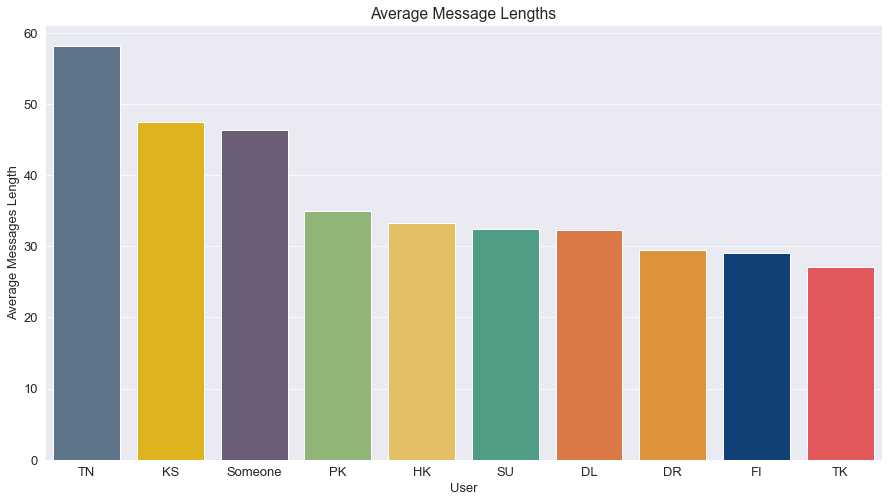

In [16]:
# Barplot of those top 10 users' average message lengths
plt.figure(figsize=(15,8))
plt.rc('font', size=13)
sns.barplot(top10df_msg.initials, top10df_msg.avg_message_length, palette = get_colors_of_certain_order(top10df_msg.initials))    # Note: the respective palette argument;

plt.title('Average Message Lengths')
plt.xlabel('User');
plt.ylabel('Average Messages Length');


# Saving the plots
plt.savefig('Generated Visuals/top10_msg_plots.png', format = 'png')

### 1. Most Active Users of the group (by media)

Cleaning the dataset for this visualisation to accomodate the media messagees and the dataset should contain only the people sorted by the number of media messages they sent in the group chat.

In [17]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media['initials'] = ''
for i in range(10):
    top10media.initials[i] = top10media.user[i].split()[0][0] + top10media.user[i].split()[1][0]

top10media.initials[9] = "Someone"

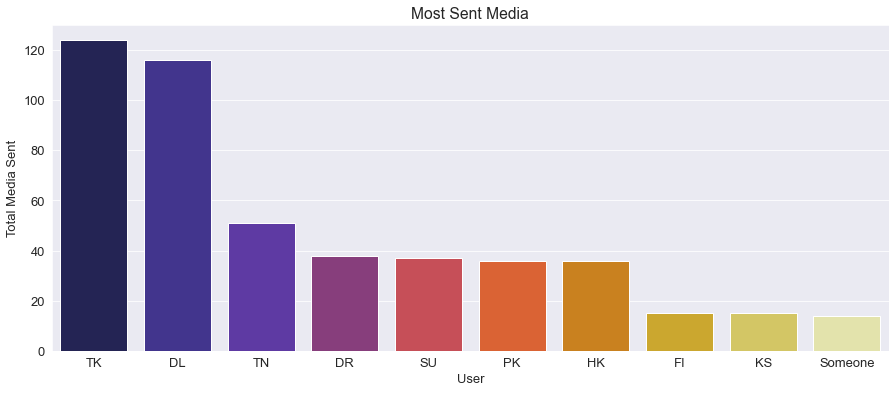

In [18]:
# Increasing the figure size
plt.figure(figsize=(15, 6))

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph;
sns.barplot(top10media.initials, top10media.media_sent, palette="CMRmap");

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');

# Saving the plots
plt.savefig('Generated Visuals/top10media.png', format = 'png')

### 3. Top 10 most emojis sent on the group

Using the emoji module that was imported earlier. 

In [19]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


In [20]:
# checking out the emojis available in the module before preprocessing the dataset for emoji analysis
emoji.UNICODE_EMOJI

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰️': ':A_button_(blood_type):',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱️': ':B_button_(blood_type):',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botsw

In [21]:
# initialising a counter object to keep track of the count the number of emojis
emoji_ctr = Counter()


# making a list of emojis used
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI['en'].keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))

# finding emojis in messges of each row 
for idx, row in df2.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1



In [22]:
top10emojis = pd.DataFrame()
# top10emojis = pd.DataFrame(data, columns={"emoji", "emoji_description", "emoji_count"}) 
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    # will be using another helper column, since during visualization, the emojis won't be rendered.
    description = emoji.demojize(item[0], language='en')[1:-1]    # using `[1:-1]` to remove the colons ':' at the end of the demojized strin
    
    # appending top 10 data of emojis.  # Loading into a DataFrame.
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,😂,1886,face_with_tears_of_joy
1,👍,364,thumbs_up
2,🏻,247,light_skin_tone
3,🔥,244,fire
4,😅,220,grinning_face_with_sweat
5,💯,180,hundred_points
6,🤣,128,rolling_on_the_floor_laughing
7,👏,101,clapping_hands
8,🤦‍♂️,83,man_facepalming
9,🙏,79,folded_hands


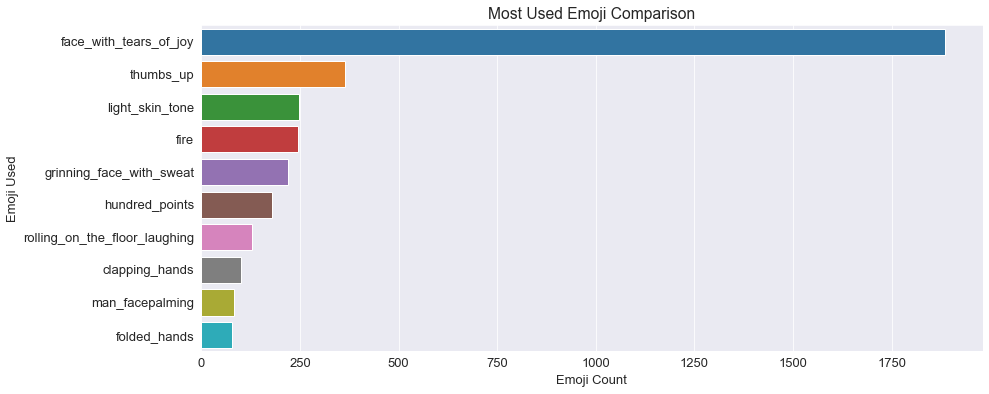

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(top10emojis.emoji_count, top10emojis.emoji_description)

plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used')
plt.title('Most Used Emoji Comparison')

plt.savefig('Generated Visuals/top10emoji.png', format='png')

### 4. Wordcloud representations

In [24]:
df3 = df.copy()

comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# added very commonly used words like yeah, deleted, message, media, okay, ok, will, etc
stopwords = STOPWORDS.update(['group','link', 'invite', 'ka','na','ha','joined', 'message', 'deleted', 'yeah',
                              'added', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 
                              'group', 'media', 'omitted','n','u','kya','re', 'b','c','f','haa','ya','ko','s',
                             'ab','d', 'nhi'])


# iterate through the DataFrame.
for val in df3.message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 8, colormap='Set1').generate(comment_words) 

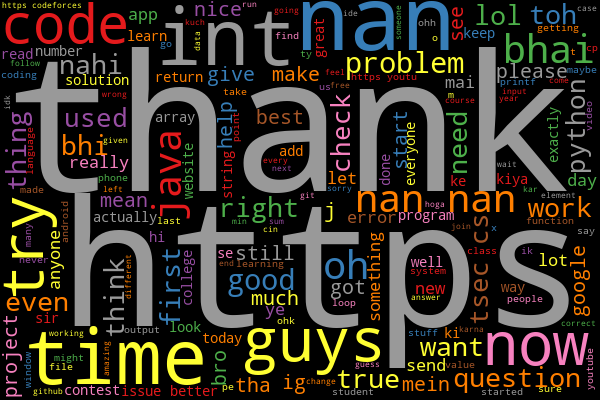

In [25]:
# wordcloud for the whole chat
wordcloud.to_file('Generated Visuals/total_wordcloud.png')
wordcloud.to_image()


The above figure represents the most used words in the entire chat.

We can restrict the study to a single specific user to understand the texting behaviour of one single user or also a specific time range to understand the topic being talked about the most during that time.

Eg : The code given below visualises the texting behaviour of a user named "Darshan Rander"

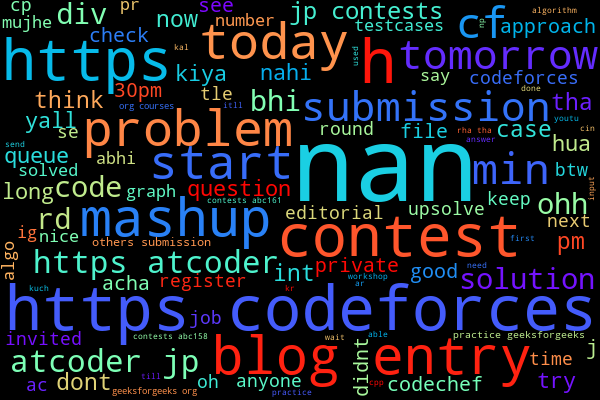

In [26]:
# wordcloud with respect to a specific user
comment_words = ' '

for val in df3[df3['user']=='Saurav Upoor (TSEC CS, SE)'].message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 8,
                colormap='rainbow').generate(comment_words) 

wordcloud.to_file('Generated Visuals/Saurav_wordcloud.png')

wordcloud.to_image()

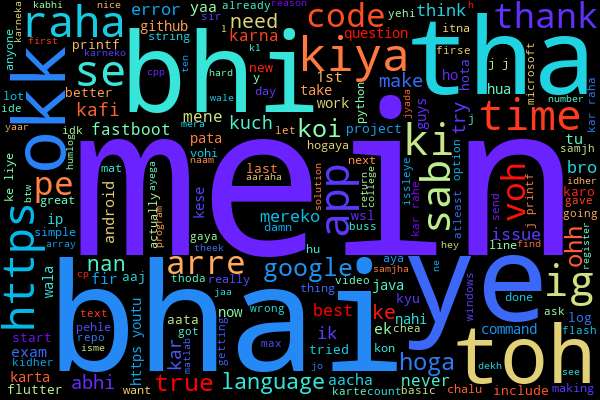

In [27]:
# wordcloud with respect to a specific user
comment_words = ' '

for val in df3[df3['user']=='Darshan Rander (TSEC, IT)'].message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 8,
                colormap='rainbow').generate(comment_words) 

wordcloud.to_file('Generated Visuals/darshan_wordcloud.png')

wordcloud.to_image()